## Importing the Dependinces

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [14]:
car_price_datasets = pd.read_csv("car data.csv")

In [3]:
car_price_datasets.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
car_price_datasets.shape

(301, 9)

In [4]:
car_price_datasets.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
car_price_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_price_datasets.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
print(car_price_datasets)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [8]:
car_price_datasets.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## checking the distribution of categorical data

In [19]:
print(car_price_datasets.Fuel_Type.value_counts())
print(car_price_datasets.Seller_Type.value_counts())
print(car_price_datasets.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Now Encoding the categorical data

In [21]:
#encoding the Fuel_Type Column
car_price_datasets.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the Seller_Type Column
car_price_datasets.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

#encoding the Transmission Column
car_price_datasets.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [22]:
car_price_datasets.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [23]:
car_price_datasets.shape

(301, 9)

## Now lets check the positive correlation and negative correlation of the datasets

In [24]:
correlation = car_price_datasets.corr()

<AxesSubplot:>

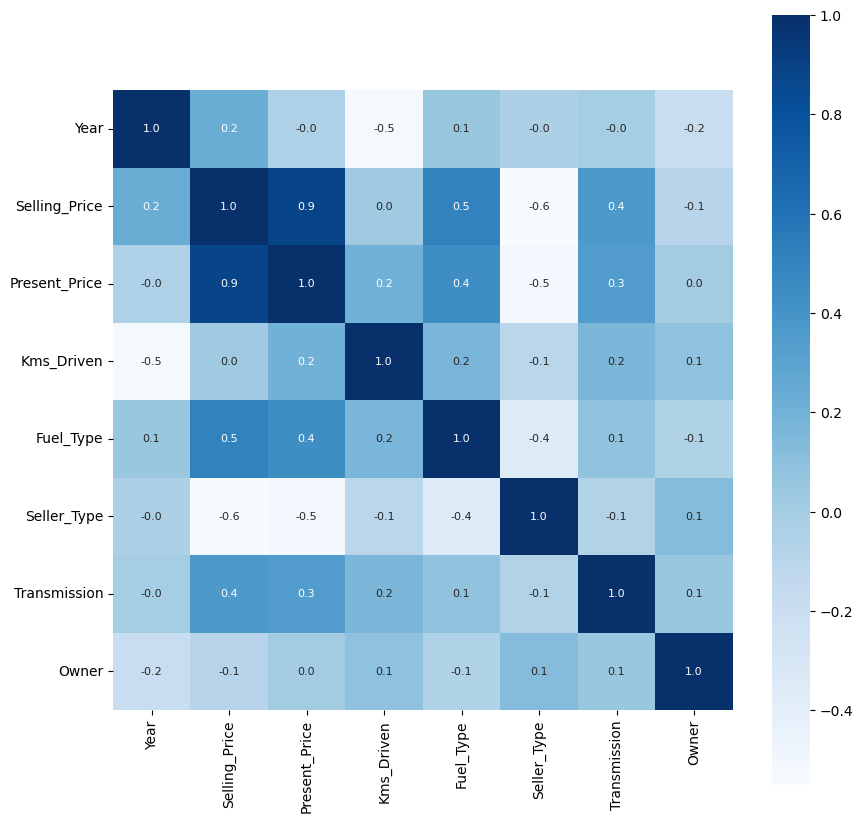

In [25]:
#Now lets construct the heat map to see the correlation of the data sets
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

## Now Lets Seprate the data sets

In [27]:
X = car_price_datasets.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y = car_price_datasets['Selling_Price']

In [28]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Now lets do trainig and splititing of the data

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


## Now lets select the model 

In [34]:
model = XGBRegressor()

In [35]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Now lets evaluating the model

In [37]:
# prediction on traning data
training_data_prediction = model.predict(X_train)

In [45]:
# R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error: ",error_score)

# Mean absolute error
error_score2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("Mean absolut Error is ",error_score2)

R squared Error:  0.9999930719254823
Mean absolut Error is  0.009179705978543671


## Visualize the actual prices and Predicted prices

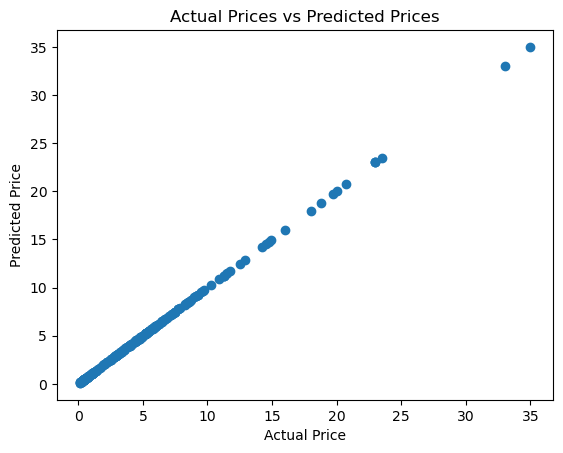

In [46]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [41]:
#Now lets do prediction for test data
testing_data_prediction = model.predict(X_test)

In [47]:
#Now lets check the R2 error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("R square error is ",error_score)

# Mean absolute error
error_score2 = metrics.mean_absolute_error(Y_test,testing_data_prediction)
print("Mean absolut Error is ",error_score2)

R square error is  0.9591253061195857
Mean absolut Error is  0.40113073527812965


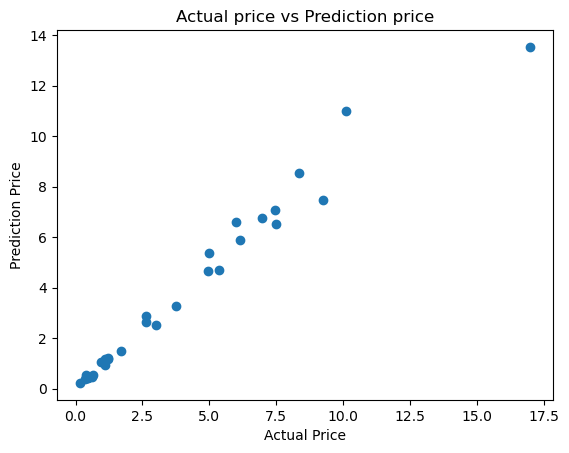

In [48]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Actual price vs Prediction price")
plt.show()

## Now lets check the usage of the model

In [49]:
from joblib import dump,load
dump(model,"Dragon.joblib")

['Dragon.joblib']

In [1]:
from joblib import dump,load
import numpy as np
model = load("Dragon.joblib")
features = np.array([[2017,9.85,6900,0,0,0,0]])
model.predict(features)

array([7.255884], dtype=float32)